# Lesson 7 - Performance 

time: 30m


## Learning outcomes

- learn basic methods of measuring performance
- 'timeit'
- %prun

An alternative representation of the Riemann zeta function is as a product over prime numbers
$$
\zeta(s) = \sum_{n=1}^{\infty} n^{-s} = \prod_{p\,\text{prime}}\frac{1}{1-p^{-s}}
$$
this is usually called an **Euler product**

In [13]:
def zeta_as_product(s,pmax=50):
    return prod([(1-p**-s)**-1 for p in prime_range(pmax)])
def zeta_as_sum(s,nmax=50):
    return sum([s.parent()(n)**(-s) for n in range(1,nmax)])

In [14]:
# In theory this is of course OK but does it converge? 
zeta_as_product(2.,1000)-zeta(2.)

-0.000208876609557151

In [27]:
zeta_as_sum(2.,4800)-zeta(2.)

-0.000208355036220409

In [29]:
# To get a similar convergence we need many more terms in the sum compared to the product
prime_pi(1000)

168

Which of these methods are more efficient? 
We can use the magic function `%timeit` or the normal function `timeit`

In [32]:
timeit("zeta_as_sum(2.,4800)")

25 loops, best of 3: 14.6 ms per loop

In [30]:
timeit("zeta_as_product(2.,1000)")

625 loops, best of 3: 873 μs per loop

It is possible to see where a function spends most time using `%prun`

In [39]:
%prun zeta_as_sum(2.,40800)

In [ ]:
For more complete profiling, including profiling Cython code and libraries etc. it is possible to use valgrind with Sage. 

**Exercise**
Compare the builtin `zeta` and the previous `euler_mac_laurin` method using `timeit` and see where the E-M function spend most time using `%prun`

## Prime numbers

It follows from the Euler product that there are infinitely many primes, since if there were not, then zeta could not have a pole at $s=1$. There are in fact deeper connections bweteen $\zeta$ and prime numbers but we won't go into that here.

In [ ]:
There are many different builtin functions for working with prime numbers:

In [41]:
list(primes(10))

[2, 3, 5, 7]

In [42]:
list(prime_range(2,10))

[2, 3, 5, 7]

In [43]:
prime_pi(100) # counting primes up to 100

25

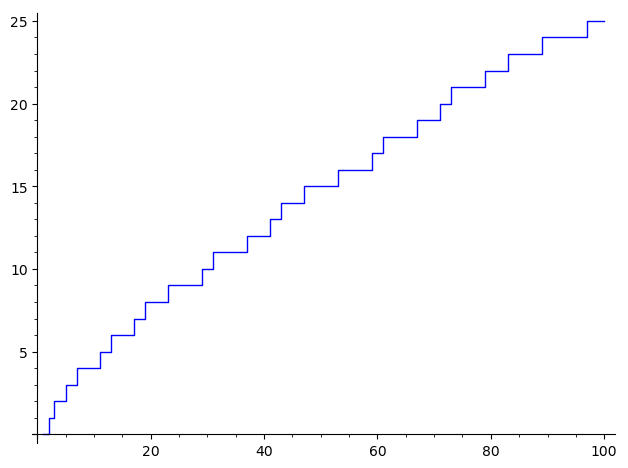

In [48]:
plot(prime_pi,1,100)

In [47]:
prime_powers(25)

[2, 3, 4, 5, 7, 8, 9, 11, 13, 16, 17, 19, 23]

**Exercise**
Write a function which counts primes in residue classes. Input: positive integer n.
Output: a list of length n-1 with the numbers of primes in different residue classes modulo n.

**Extra Exercise**
Write a wrapper to the above function to be able to plot step-functions as above. 